In [94]:
# munging imports 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# modeling imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler


# Loading data 

### Daily data

In [15]:
df_d=pd.read_csv('/Users/abdalrahmanalzahrani/Documents/Data sciense bootcamb/Project/Bike-Sharing-Dataset/day.csv')
df_d.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


### Hourly data 

In [3]:
df_h=pd.read_csv('/Users/abdalrahmanalzahrani/Documents/Data sciense bootcamb/Project/Bike-Sharing-Dataset/hour.csv')
df_h.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


# EDA 

In [4]:
df_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
df_h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


### Visulizing data

Let's plot the total number of the rented bikes against the days 

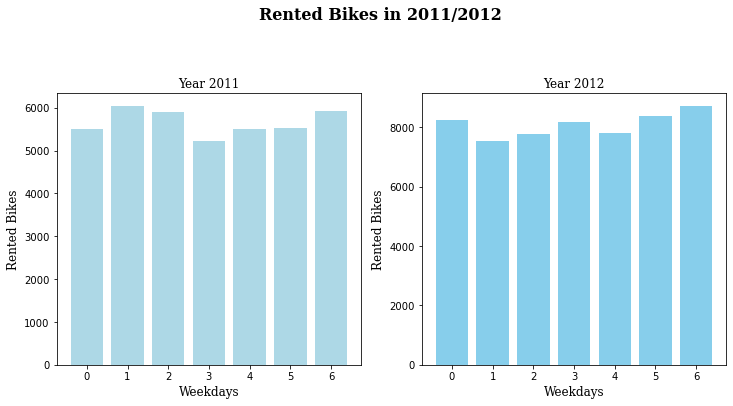

In [6]:

plt.figure(figsize=[12,5])
plt.suptitle('Rented Bikes in 2011/2012',family='serif',weight='bold',fontsize = 16,y=1.12)

#2011
plt.subplot(1,2,1)
plt.title('Year 2011',family='serif',fontsize = 12)
yr_2011=df_d[df_d.yr==0]
weekday1=yr_2011.weekday
total1=yr_2011.cnt
plt.bar(weekday1,total1,color='lightblue')
plt.xlabel("Weekdays",family='serif',fontsize = 12)
plt.ylabel("Rented Bikes",family='serif',fontsize = 12);

#2012
plt.subplot(1,2,2)
plt.title('Year 2012',family='serif',fontsize = 12)
yr_2012=df_d[df_d.yr==1]
weekday2=yr_2012.weekday
total2=yr_2012.cnt
plt.bar(weekday2,total2,color='skyblue')
plt.xlabel("Weekdays",family='serif',fontsize = 12)
plt.ylabel("Rented Bikes",family='serif',fontsize = 12);

Let's plot the total number of the rented bikes against the hours 

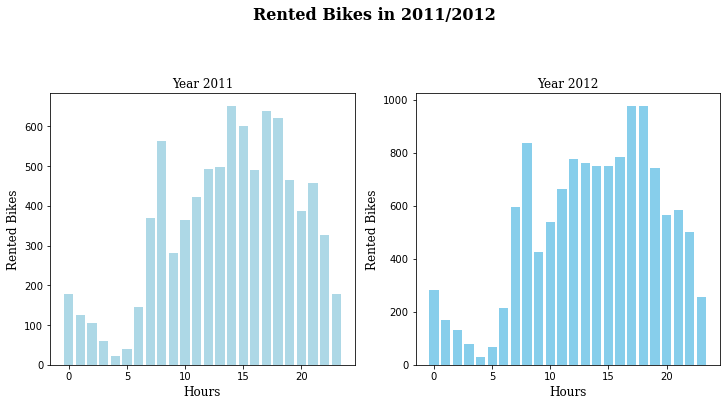

In [7]:
plt.figure(figsize=[12,5])
plt.suptitle('Rented Bikes in 2011/2012',family='serif',weight='bold',fontsize = 16,y=1.12)

#2011
plt.subplot(1,2,1)
plt.title('Year 2011',family='serif',fontsize = 12)
yr_2011=df_h[df_h.yr==0]
hr1=yr_2011.hr
total1=yr_2011.cnt
plt.bar(hr1,total1,color='lightblue')
plt.xlabel("Hours",family='serif',fontsize = 12)
plt.ylabel("Rented Bikes",family='serif',fontsize = 12);

#2012
plt.subplot(1,2,2)
plt.title('Year 2012',family='serif',fontsize = 12)
yr_2012=df_h[df_h.yr==1]
hr2=yr_2012.hr
total2=yr_2012.cnt
plt.bar(hr2,total2,color='skyblue')
plt.xlabel("Hours",family='serif',fontsize = 12)
plt.ylabel("Rented Bikes",family='serif',fontsize = 12);

# Add a new column

In order to make the perdiction task possible, we need to add a target which indicates weather the day is a good day for an event to take place or not.

To do so, we are going to calc the mean of rented bike for the whole 2011 year and then the days that have a total of rented bikes that equles or greater than the mean then mark them as a good day otherwise it is not.

In [8]:
#2011
yr_2011=df_d[df_d.yr==0]
ave_rented_bikes=int(yr_2011.cnt.mean())
ave_rented_bikes

3405

Now let's have a subset of our data  

In [18]:
df_d_subset=df_d.loc[:,['instant','cnt']]
df_d_subset

,instant,cnt
0,1,985
1,2,801
2,3,1349
3,4,1562
4,5,1600
...,...,...
726,727,2114
727,728,3095
728,729,1341
729,730,1796


Let's add the target

In [19]:
# If the cnt>=Mean, then mark this day as a good day
# else, mark it as a not good day
df_d_subset['GoodDay'] = df_d_subset['cnt'].apply(lambda x: 1 if x >= ave_rented_bikes else 0)
df_d_subset

,instant,cnt,GoodDay
0,1,985,0
1,2,801,0
2,3,1349,0
3,4,1562,0
4,5,1600,0
...,...,...,...
726,727,2114,0
727,728,3095,0
728,729,1341,0
729,730,1796,0


Let's check if our data is class-imbalanced or not 

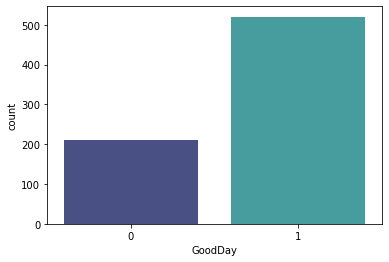

In [68]:
sns.countplot(x='GoodDay',data=df_d_new,palette="mako");

From what we can see, it is obvious that the data is imbalanced. 

Let's find the percentage of the minority classes.

In [82]:
notGoodDays=df_d_subset['GoodDay'].value_counts()[0]
print((notGoodDays/731)*100)

28.864569083447332


That means only ~29% of our data belongs to class 0 (notGoodDays).

#TODO *fix imbalanced data issue*

Let's merge the data

In [20]:
#Drop cnt column prior to the merger to avoid the redundancy
df_d_subset=df_d_subset.drop(['cnt'],axis=1)
df_d_subset

,instant,GoodDay
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
726,727,0
727,728,0
728,729,0
729,730,0


In [21]:
#Merge
df_d=pd.merge(df_d,df_d_subset,on='instant')
df_d.sample(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,GoodDay
32,33,2011-02-02,1,0,2,0,3,1,2,0.260000,0.254417,0.775417,0.264308,72,1454,1526,0
445,446,2012-03-21,2,1,3,0,3,1,2,0.531667,0.513258,0.821250,0.089558,1122,5108,6230,1
206,207,2011-07-26,3,0,7,0,2,1,1,0.771667,0.696979,0.540833,0.200258,750,3840,4590,1
80,81,2011-03-22,2,0,3,0,2,1,1,0.441667,0.440642,0.624583,0.225750,460,2243,2703,0
590,591,2012-08-13,3,1,8,0,1,1,1,0.720833,0.662254,0.545417,0.136212,1207,5676,6883,1
593,594,2012-08-16,3,1,8,0,4,1,1,0.719167,0.654688,0.519167,0.141796,1338,6267,7605,1
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729,0
703,704,2012-12-04,4,1,12,0,2,1,1,0.475833,0.469054,0.733750,0.174129,551,6055,6606,1
249,250,2011-09-07,3,0,9,0,3,1,3,0.599167,0.544229,0.917083,0.097021,118,1878,1996,0
616,617,2012-09-08,3,1,9,0,6,0,2,0.659167,0.611121,0.799167,0.281104,1557,4419,5976,1


Let's drop unnecessary data 

In [48]:
df_d_new=df_d.drop(['instant','dteday','yr','casual','registered','cnt'],axis=1)
df_d_new

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,GoodDay
0,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,0
1,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,0
2,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,0
3,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,0
4,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,0
...,...,...,...,...,...,...,...,...,...,...,...
726,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,0
727,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,0
728,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,0
729,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,0


Let's create a heatmap to find out the correlation between the features themselves and the target as well

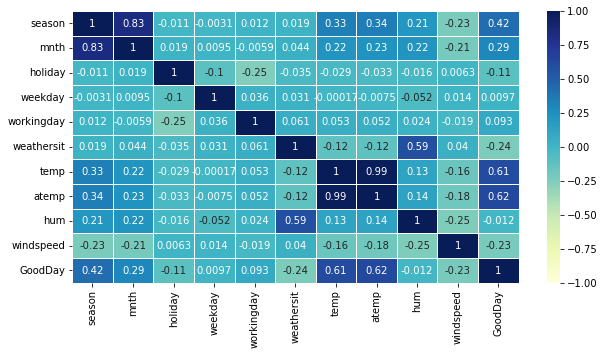

In [44]:
plt.figure(figsize = (10,5))
sns.heatmap(df_d_new.corr(),cmap="YlGnBu",vmin=-1, vmax=1,linewidths=.5,annot=True);

As you can see form the heatmap above, there is a relativaly high correlation between the target(GoodDay) and the features atemp, temp, mnth and season.

Let's keep the features just mentioned and eliminate others. 

In [49]:
df_d_new=df_d_new.drop(['holiday','weekday','workingday','weathersit','hum','windspeed'],axis=1)
df_d_new

,season,mnth,temp,atemp,GoodDay
0,1,1,0.344167,0.363625,0
1,1,1,0.363478,0.353739,0
2,1,1,0.196364,0.189405,0
3,1,1,0.200000,0.212122,0
4,1,1,0.226957,0.229270,0
...,...,...,...,...,...
726,1,12,0.254167,0.226642,0
727,1,12,0.253333,0.255046,0
728,1,12,0.253333,0.242400,0
729,1,12,0.255833,0.231700,0


Now let's consider the correlation between the features themselves 

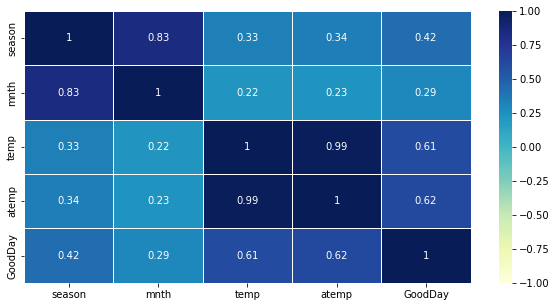

In [50]:
plt.figure(figsize = (10,5))
sns.heatmap(df_d_new.corr(),cmap="YlGnBu",vmin=-1, vmax=1,linewidths=.5,annot=True);

As you can see form the heatmap above, the features atemp and temp are hieghly correlated as well as mnth and season features.

Therefore, we are going to eliminate temp and mnth.

In [52]:
df_d_new=df_d_new.drop(['temp','mnth'],axis=1)
df_d_new

,season,atemp,GoodDay
0,1,0.363625,0
1,1,0.353739,0
2,1,0.189405,0
3,1,0.212122,0
4,1,0.229270,0
...,...,...,...
726,1,0.226642,0
727,1,0.255046,0
728,1,0.242400,0
729,1,0.231700,0


# Prediction Model 

We will use Logistic Regression Model 

In [89]:
logit=LogisticRegression()#TODO: try C=1,0.5,100,1000
x_train,x_test,y_train,y_test=train_test_split(df_d_new.loc[:,'season':'atemp'],df_d_new['GoodDay'],test_size=30)


Let's fit our model and compute its accuracy 

In [97]:
predictions=logit.predict(x_test)
accuracy_score(y_test,predictions)

0.8666666666666667